# **ADD HERE THE NOTEBOOK NAME**

## Objectives

* Write here your notebook objective, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write here which data or information you need to run the notebook

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook

## Additional Comments


* In case you have any additional comments that don't fit in the previous bullets, please state them here.


---

# Install python packages in the notebooks

<span style="color:red;">IMPORTANT!!! Change "ml-template-forked" to the name that you have given your GitHub/GitPod Workspace.</span>

In [3]:
%pip install -r /workspace/manned-unmanned-airplane-classifer/requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 9.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory.  

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/manned-unmanned-airplane-classifer/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/manned-unmanned-airplane-classifer'

---

---

## Table of Content

- [Section 1](#section-1)
- [Section 2](#section-2)
- [Save files to workspace](#save-files-to-workspace)


---

# Biplanes vs Monoplanes from 1930s to early 1940s

new

In [ ]:
# --- Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
# --- Step 2: Load Data
data = {
    'Name': [
        'Bristol F.2', 'Sopwith Camel', 'SPAD S.XIII', 'Curtiss JN-4', 'Albatros D.V',
        'Nieuport 17', 'Fokker Dr.I', 'Airco DH.2', 'Rumpler C.I', 'Morane-Saulnier L',
        'P-51 Mustang', 'F-86 Sabre', 'MiG-15', 'Spitfire Mk IX', 'Messerschmitt Bf 109',
        'Hawker Hurricane', 'Yak-3', 'F4U Corsair', 'P-38 Lightning', 'Focke-Wulf Fw 190'
    ],
    'Manufacturer': [
        'Bristol', 'Sopwith', 'SPAD', 'Curtiss', 'Albatros',
        'Nieuport', 'Fokker', 'Airco', 'Rumpler', 'Morane-Saulnier',
        'North American', 'North American', 'Mikoyan-Gurevich', 'Supermarine', 'Messerschmitt',
        'Hawker', 'Yakovlev', 'Vought', 'Lockheed', 'Focke-Wulf'
    ],
    'FirstFlight': [
        1916, 1917, 1917, 1915, 1917,
        1916, 1917, 1915, 1915, 1915,
        1940, 1947, 1947, 1942, 1937,
        1935, 1944, 1940, 1939, 1939
    ],
    'Wingspan': [
        9.8, 10.0, 9.7, 11.4, 9.4, 7.9, 8.9, 9.5, 13.9, 9.8,
        11.3, 9.0, 12.2, 9.8, 10.6, 11.0, 10.7, 11.0, 10.5, 10.0
    ],
    'MaxSpeed': [
        414, 430, 441, 295, 195, 183, 175, 370, 222, 210,
        470, 525, 547, 470, 500, 460, 390, 510, 520, 592
    ],
    'Weight': [
        2300, 2200, 2300, 2800, 1700, 670, 830, 1650, 3500, 1220,
        2200, 2000, 2950, 2400, 2450, 2350, 2000, 2600, 2800, 2700
    ],
    'Label': [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1
    ],
    'Notes': [
        '', 'Used in WW1', None, 'Trainer', 'Scout',
        '!', '  ', 'Experimental', 'Recon', ' ',
        'WW2 fighter', None, 'Korean War', 'iconic', 'fighter',
        None, 'lightweight', '', 'Long range', None
    ]
}

df = pd.DataFrame(data)

In [ ]:
# --- Step 3: Initial Data Inspection
print("Head of the dataset:")
print(df.head(), "\n")

print("Dataset Info:")
print(df.info(), "\n")

print("Statistical Summary:")
print(df.describe(include='all'), "\n")

In [ ]:
# --- Step 4: Clean Data
# Drop non-numeric or irrelevant columns
df.drop(columns=['Notes'], inplace=True)

# Drop missing values just in case (optional, dataset appears clean)
df.dropna(inplace=True)

In [ ]:
# --- Step 5: Feature Matrix and Target Vector
X = df[['Wingspan', 'MaxSpeed', 'Weight', 'FirstFlight']]
y = df['Label']

In [ ]:
# --- Step 6: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# --- Step 7: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# --- Step 8: Save Preprocessed Data for Reuse
joblib.dump((X_train_scaled, X_test_scaled, y_train, y_test), 'aircraft_data_scaled.pkl')

Head of the dataset:
            Name Manufacturer  FirstFlight  Wingspan  MaxSpeed  Weight  Label  \
0    Bristol F.2      Bristol         1916       9.8       414    2300      0   
1  Sopwith Camel      Sopwith         1917      10.0       430    2200      0   
2    SPAD S.XIII         SPAD         1917       9.7       441    2300      0   
3   Curtiss JN-4      Curtiss         1915      11.4       295    2800      0   
4   Albatros D.V     Albatros         1917       9.4       195    1700      0   

         Notes  
0               
1  Used in WW1  
2         None  
3      Trainer  
4        Scout   

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          20 non-null     object 
 1   Manufacturer  20 non-null     object 
 2   FirstFlight   20 non-null     int64  
 3   Wingspan      20 non-null     float64
 4   MaxSpeed 

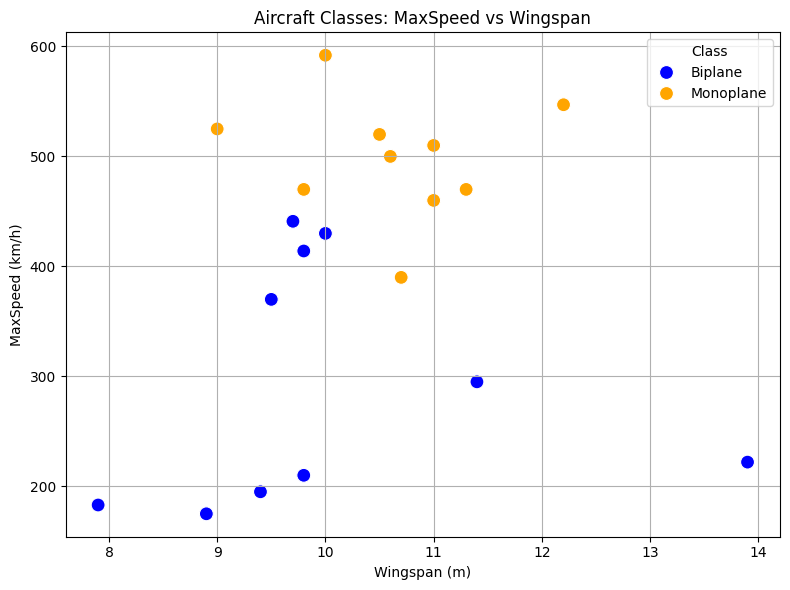

In [ ]:
# --- Step 9: Visualize Class Distribution (MaxSpeed vs Wingspan)
plot_df = df[['Wingspan', 'MaxSpeed', 'Label']].copy()
plot_df['Label'] = plot_df['Label'].map({0: 'Biplane', 1: 'Monoplane'})

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_df,
    x='Wingspan',
    y='MaxSpeed',
    hue='Label',
    palette={'Biplane': 'blue', 'Monoplane': 'orange'},
    s=100
)
plt.title('Aircraft Classes: MaxSpeed vs Wingspan')
plt.xlabel('Wingspan (m)')
plt.ylabel('MaxSpeed (km/h)')
plt.grid(True)
plt.legend(title='Class')
plt.tight_layout()
plt.show()


---

# Section 2


Section 2 content

---

# Save files to workspace

We will generate the following files
* Train set
* Test set
* Data cleaning and Feature Engineering pipeline
* Modeling pipeline
* etc.

In [ ]:
topic = 'topic'  # datasets
notebook = 'notebook'  # collections
version = 'v1'
file_path = f'outputs/{notebook}/{notebook}/{version}'

try:
    os.makedirs(name=file_path)
except Exception as e:
    print(e)

In [ ]:
import os
try:
  os.makedirs(name='outputs/datasets/collection') # create outputs/datasets/collection folder
except Exception as e:
  print(e)

df.to_csv(f"outputs/datasets/collection/TelcoCustomerChurn.csv",index=False)

## Train Set

Note that ...

In [ ]:
print(X_train.shape)
X_train.head()

X_train.to_csv(f"{file_path}/X_train.csv", index=False)

In [ ]:
y_train

In [ ]:
y_train.to_csv(f"{file_path}/y_train.csv", index=False)